# Identify spatial domains using STDrug for multiple samples

In [ ]:
import scanpy as sc
from stdrug import STDrug

In [3]:
# Read sample HCC data
tumor_samples = [
    sc.read_h5ad("/home/remisiki/p/um/tmp/workspace/stdrug/STdrug/data/HCC01T.h5ad"),
    sc.read_h5ad("/home/remisiki/p/um/tmp/workspace/stdrug/STdrug/data/HCC02T.h5ad"),
    sc.read_h5ad("/home/remisiki/p/um/tmp/workspace/stdrug/STdrug/data/HCC03T.h5ad"),
    sc.read_h5ad("/home/remisiki/p/um/tmp/workspace/stdrug/STdrug/data/HCC04T.h5ad"),
]
normal_samples = [
    sc.read_h5ad("/home/remisiki/p/um/tmp/workspace/stdrug/STdrug/data/HCC01N.h5ad"),
    sc.read_h5ad("/home/remisiki/p/um/tmp/workspace/stdrug/STdrug/data/HCC02N.h5ad"),
    sc.read_h5ad("/home/remisiki/p/um/tmp/workspace/stdrug/STdrug/data/HCC03N.h5ad"),
    sc.read_h5ad("/home/remisiki/p/um/tmp/workspace/stdrug/STdrug/data/HCC04N.h5ad"),
]

Run STDrug spatial domain identification module and save outputs to current directory `output`. This will create a `partition.csv` which contains clustering result for all spatial samples, which will be used as input for the STDrug drug score calculation module.

In [4]:
result_df = STDrug.findSpatialDomains(tumor_samples, normal_samples, nclust=5, output_dir="output")

Check data format


/home/remisiki/p/um/tmp/workspace/stdrug/package_test/venv/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Normalize data
Run PCA


2025-12-27 09:17:50,041 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Run harmony


2025-12-27 09:17:54,051 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-12-27 09:17:54,201 - harmonypy - INFO - Iteration 1 of 50
2025-12-27 09:18:02,744 - harmonypy - INFO - Iteration 2 of 50
2025-12-27 09:18:11,304 - harmonypy - INFO - Iteration 3 of 50
2025-12-27 09:18:20,076 - harmonypy - INFO - Iteration 4 of 50
2025-12-27 09:18:28,861 - harmonypy - INFO - Iteration 5 of 50
2025-12-27 09:18:37,643 - harmonypy - INFO - Converged after 5 iterations


Train GCN
Build graph on batch HCC01T
Calculateing adj matrix using xy only...
Run 1: l [0.0001, 1000], p [0.0, 151.28792]
Run 2: l [0.0001, 500.00005], p [0.0, 40.236973]
Run 3: l [0.0001, 250.00007499999998], p [0.0, 9.746187]
Run 4: l [0.0001, 125.00008749999999], p [0.0, 1.7532585]
Run 5: l [62.50009375, 125.00008749999999], p [0.033455253, 1.7532585]
Run 6: l [62.50009375, 93.750090625], p [0.033455253, 0.59353566]
Run 7: l [78.1250921875, 93.750090625], p [0.2144388, 0.59353566]
Run 8: l [85.93759140625, 93.750090625], p [0.3814237, 0.59353566]
Run 9: l [89.843841015625, 93.750090625], p [0.4823544, 0.59353566]
Run 10: l [89.843841015625, 91.7969658203125], p [0.4823544, 0.5367303]
recommended l =  90.82040341796875
Build graph on batch HCC02T
Calculateing adj matrix using xy only...
Run 1: l [0.0001, 1000], p [0.0, 125.30302]
Run 2: l [0.0001, 500.00005], p [0.0, 32.58772]
Run 3: l [0.0001, 250.00007499999998], p [0.0, 7.6831074]
Run 4: l [0.0001, 125.00008749999999], p [0.0, 1.

/home/remisiki/p/um/tmp/workspace/stdrug/package_test/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch  0
Res =  0.4 Num of clusters =  5
recommended res =  0.4
Initializing cluster centers with louvain, resolution =  0.4
Epoch  0
Epoch  10
Epoch  20
delta_label  0.00031407035 < tol  0.001
Reach tolerance threshold. Stopping training.
Total epoch: 28
Train GCN on batch HCC02T
Start at res =  0.4 step =  0.1
Initializing cluster centers with louvain, resolution =  0.4
Epoch  0
Res =  0.4 Num of clusters =  7
Initializing cluster centers with louvain, resolution =  0.30000000000000004
Epoch  0
Res =  0.30000000000000004 Num of clusters =  7
Res changed to 0.30000000000000004
Initializing cluster centers with louvain, resolution =  0.20000000000000004
Epoch  0
Res =  0.20000000000000004 Num of clusters =  6
Res changed to 0.20000000000000004
Initializing cluster centers with louvain, resolution =  0.10000000000000003
Epoch  0
Res =  0.10000000000000003 Num of clusters =  4
Step changed to 0.05
Initializing cluster centers with louvain, resolution =  0.15000000000000002
Epoch  0
Res =

# Visualize spatial domains

In [30]:
# Read output h5ad file
adata = sc.read_h5ad("output/checkpoint/stads_cluster.h5ad")

/tmp/ipykernel_1252583/3105944420.py:9: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/home/remisiki/p/um/tmp/workspace/stdrug/package_test/venv/lib/python3.12/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"{value_to_plot}_colors"] = colors_list
/tmp/ipykernel_1252583/3105944420.py:9: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/home/remisiki/p/um/tmp/workspace/stdrug/package_test/venv/lib/python3.12/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"{value_to_plot}_colors"] = colors_list
/tmp/ipykernel_1252583/3105944420.py:9: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/home/remisiki/p/um/tmp/workspace/stdrug/package_test/venv/lib/python3.12/site-packages/scanpy/plotting/_utils

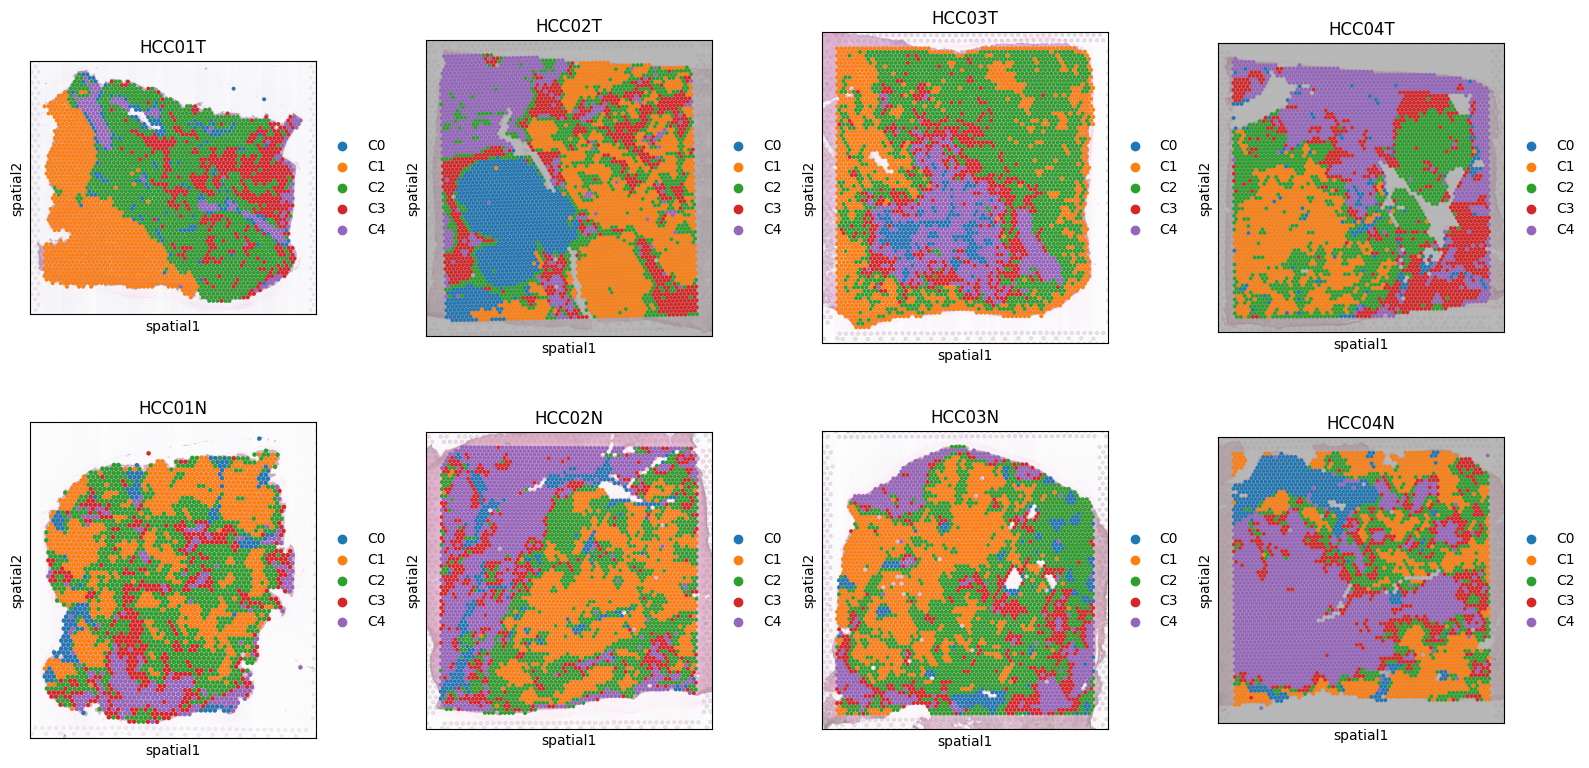

In [57]:
import matplotlib.pyplot as plt

batches = adata.obs["batch"].unique()

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for ax, bid in zip(axes.flatten(), batches):
    adata_batch = adata[adata.obs["batch"] == bid]
    sc.pl.spatial(
        adata_batch,
        color="cluster_stads",
        library_id=bid,
        alpha_img=0.5,
        size=1.5,
        show=False,
        ax=ax,
    )
    ax.set_title(bid)

plt.tight_layout()
plt.show()